In [28]:
from mp_gp_test import get_holeids, get_trainingSet_by_point, get_test_points_holeid, 
from scipy import stats
import pandas as pd
import scipy.spatial as spatial
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

In [31]:
# se cargan los datos de entrenamiento
train_data = pd.read_csv('../../GP_Data/cy17_spc_assays_rl6_entry.csv')
train_cols = ['midx', 'midy', 'midz', 'cut']

test_data = pd.read_csv('../../GP_Data/cy17_spc_assays_pvo_entry.csv')
test_cols = ['midx', 'midy', 'midz']
jtplot.style(theme='onedork',figsize = (14,10))

In [92]:
HOLEIDs = get_holeids()
holeid = HOLEIDs[0]
distancia = 70
test_points = get_test_points_holeid(holeid)
_, y = get_trainingSet_by_point(test_points[0,:], distancia)

 C:\Users\jpdon\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:427: RuntimeWarning:invalid value encountered in sqrt
 C:\Users\jpdon\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning:The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.


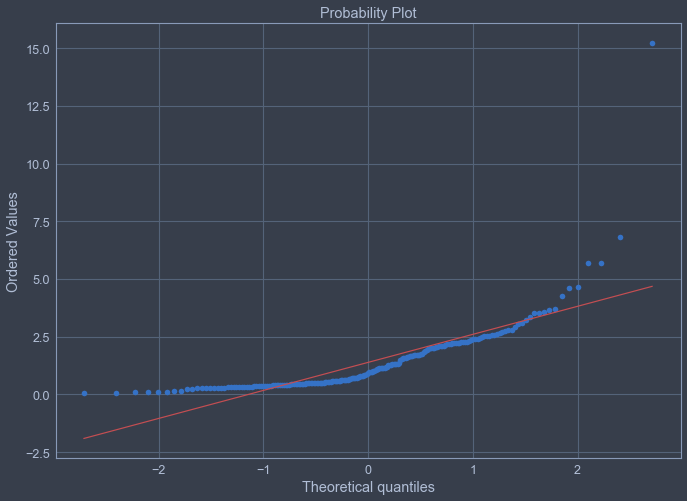

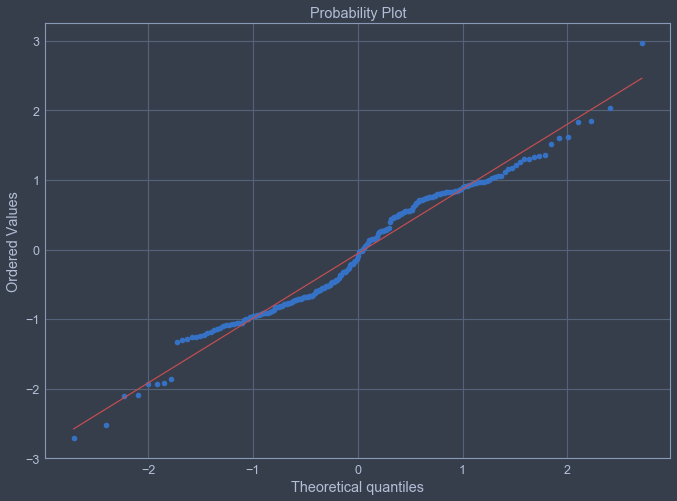

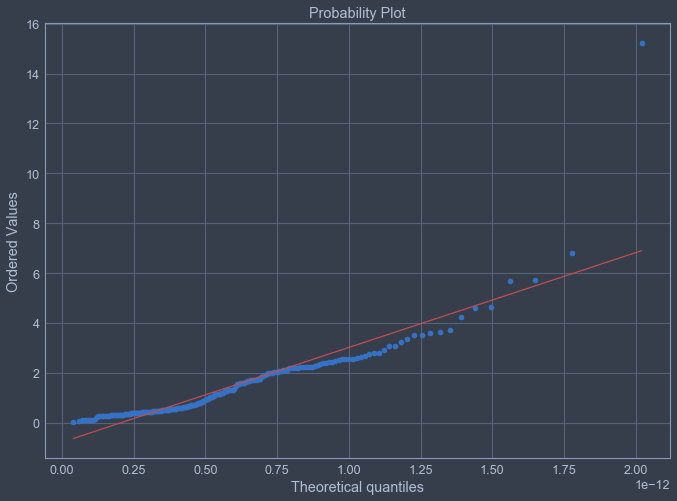

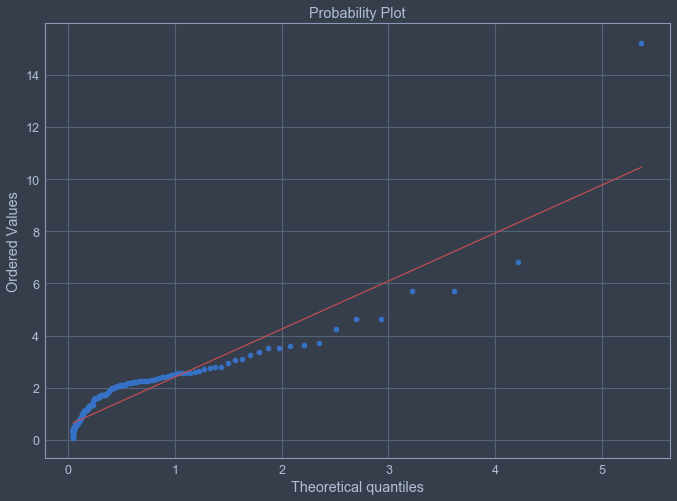

In [93]:
y_matrix = y['cut'].as_matrix()

# datos sin transformar contra normal
fig = plt.figure()
ax1 = fig.add_subplot(111)
stats.probplot(y_matrix, plot = ax1)

# datos transformados contra normal
fig = plt.figure()
ax2 = fig.add_subplot(111)
y_transf, _ = stats.boxcox(y_matrix)
y_matrix_mean = y_matrix.mean()
stats.probplot(y_transf, plot = ax2)

# datos sin transformar contra beta
fig = plt.figure()
ax3 = fig.add_subplot(111)
alpha, beta, _, _ = stats.beta.fit(y_matrix)
stats.probplot(y_matrix, dist=stats.beta(alpha,beta), plot = ax3)

# datos sin transformar contra gamma
fig = plt.figure()
ax4 = fig.add_subplot(111)
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(y_matrix)
stats.probplot(y_matrix, dist=stats.gamma(fit_alpha, fit_loc, fit_beta), plot = ax4)


plt.show()

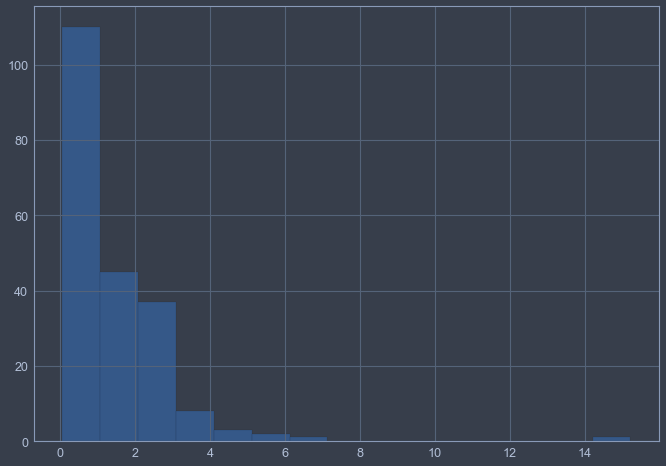

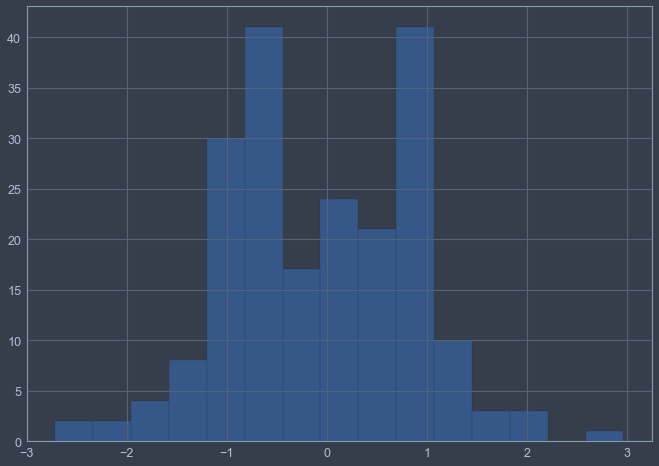

In [94]:
plt.figure()
plt.hist(y_matrix, bins = 15, alpha=0.5, histtype='bar', ec='black')

plt.figure()
plt.hist(y_transf, bins = 15, alpha=0.5, histtype='bar', ec='black')

plt.show()

In [81]:
y_matrix.shape[0]

294